# Image Classification with Keras
###  ICPE 638 - Spring 2023

[Enrique Z. Losoya](https://orcid.org/0000-0001-7763-3349), and [Jian Tao](https://orcid.org/0000-0003-4228-6089)], Texas A&M University.
Updated: Jan. 3, 2023.

**(40 points)**

- Name:  Juan David Baquero Barrios
- GitHub or Google colab link: https://drive.google.com/file/d/1zfnNOLfecB-m_yFCz2JWzGoy0m4Advh7/view?usp=sharing

### **Dataset**
The goal of this assignment is to build a deep neural network model to classify images in the CIFAR-10 dataset. The CIFAR-10 dataset consists of 60,000 32x32 color images classified over 10 classes, with 6,000 images per class. There are 5,0000 training images and 10,000 test images. 

The 10 classes are:
1. Airplane										
2. Automobile										
3. Bird										
4. Cat										
5. Deer										
6. Dog										
7. Frog										
8. Horse										
9. Ship										
10. Truck

### **Problem**

1. Create two deep neural network models: 
   1. One with one dense layer with 512 neurons per layer
   2. One with two dense layers with 256 neurons in each layer.

2. Compile both models by setting the optimizer to **adam** (adaptive moment estimation) and the loss function to **"sparse_categorical_crossentropy"**. 

3. Train both models for **20 epochs** and output the **validation error** for both models.

Ans. The acurracy between a deep neural network with 2 layers and more units in each one is lower (0.4213) in comparison to themodel of the convoloution neural network (0.7872)

4. Compare the validation error of your models against that of the convolution neural network (CNN) model provided below and explain why the CNN model performs better.

Ans.
* The acurracy between a deep neural network with 2 layers and more units in each one is lower (0.4213) in comparison to themodel of the convoloution neural network (0.7872). Dispite CNN model its heirarchical structure, this model alternates at the beginning convolutional layer (which function is to apply filters to the image and extract the features of it) and maxpooling layer (which reduce the spatial dimensionality and with an operation, takes the feature of it) and at the end this model has 2 layers of neural networks to extract and analyse the patterns.

5. **(Extra Credit)**: Modify the CNN model to improve the validation error and discuss your results.

Ans. 
*   For this model I changed the following parameters which reach an accuracy of 0.91:

- Conv2D. I increased the ** kernel number  or filter** in each layer, mostly in the first layers. which function in to extract the features from the image. I also changed the number of **strides** in the first layer, which has a the function of filter the pixel, in this layer I changed it to 1 ,and the second layer to 2,  and kept the value for the rest. 

- Maxpooling : I kept all the values

- CNN layer : I increased the **number of units** which has the function to extract and analyse the patterns

- Optimizer: I changed it to **nadam** that combines the Adam and Nesterov momentum optimization algorithms.

-Epoch: Increasing this number would improve the accuracy, however I kept it due the time and memory it takes everytime it changes, due is the number of times the training data passes for alla the network as an iteration.

## Load and process the dataset for training
**Please don't change this section!** 

You can use `(X_train, y_train) and (X_test, y_test)` for training and testing in your code respectively.

In [1]:
%load_ext tensorboard
from tensorflow.keras import utils, callbacks, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
import os, datetime

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


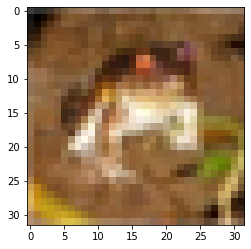

In [3]:
# show the first image in the data set
plt.imshow(X_train[0])

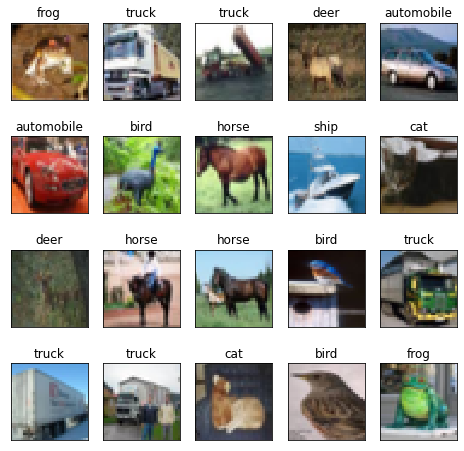

In [4]:
# show the first 15 images in the data set.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
fig = plt.figure(figsize=(8,8))
for i in range(20):
    plt.subplot(4,5,i+1)
    #plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title(class_names[y_train[i][0]])
    plt.xticks([])
    plt.yticks([])

In [5]:
# Normalize the train dataset
X_train = utils.normalize(X_train, axis=1)
# Normalize the test dataset
X_test = utils.normalize(X_test, axis=1)

## Build, compile, and train the model object
You can start creating, compiling, and training your models here.

In [6]:
X_train = utils.normalize(X_train, axis=1)
X_test = utils.normalize(X_test, axis=1)

In [7]:
model = Sequential()
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=256, activation='softmax'))

In [8]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
model.fit(X_train, y_train, epochs=20, batch_size=1000, verbose=1)

Epoch 1/20
50/50 [==============================] - 3s 11ms/step - loss: 2.2845 - accuracy: 0.2057
Epoch 2/20
50/50 [==============================] - 1s 10ms/step - loss: 2.0340 - accuracy: 0.2748
Epoch 3/20
50/50 [==============================] - 1s 10ms/step - loss: 1.9833 - accuracy: 0.3029
Epoch 4/20
50/50 [==============================] - 0s 9ms/step - loss: 1.9468 - accuracy: 0.3226
Epoch 5/20
50/50 [==============================] - 0s 9ms/step - loss: 1.9378 - accuracy: 0.3168
Epoch 6/20
50/50 [==============================] - 0s 9ms/step - loss: 1.8873 - accuracy: 0.3465
Epoch 7/20
50/50 [==============================] - 0s 9ms/step - loss: 1.8746 - accuracy: 0.3451
Epoch 8/20
50/50 [==============================] - 0s 9ms/step - loss: 1.8522 - accuracy: 0.3574
Epoch 9/20
50/50 [==============================] - 0s 9ms/step - loss: 1.8289 - accuracy: 0.3649
Epoch 10/20
50/50 [==============================] - 0s 9ms/step - loss: 1.8060 - accuracy: 0.3766
Epoch 11/20
50/5

## Compare against Convolution Neural Network (CNN) Model
**Please don't change this section!** 

You just need to run the following to create and train a convolution neural network and compare the validation error to those from your models and explain why CNN is better.

In [10]:
!rm -rf logs/model_cnn
#Build the model object
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dense(10, activation='softmax'))

# Compile the model
model_cnn.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
# This is needed for loading Tensorboard.
tensorboard_callback = callbacks.TensorBoard(log_dir="logs/model_cnn", histogram_freq=1)
model_cnn.fit(x=X_train, y=y_train, epochs=20, 
      validation_data=(X_test, y_test),
      callbacks=[tensorboard_callback]) # Start training process

Epoch 1/20
1563/1563 [==============================] - 13s 5ms/step - loss: 1.7581 - accuracy: 0.3619 - val_loss: 1.4690 - val_accuracy: 0.4707
Epoch 2/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3799 - accuracy: 0.5083 - val_loss: 1.2743 - val_accuracy: 0.5448
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2226 - accuracy: 0.5685 - val_loss: 1.1694 - val_accuracy: 0.5891
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1317 - accuracy: 0.6030 - val_loss: 1.1492 - val_accuracy: 0.5964
Epoch 5/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0566 - accuracy: 0.6316 - val_loss: 1.1287 - val_accuracy: 0.6000
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0001 - accuracy: 0.6505 - val_loss: 1.0577 - val_accuracy: 0.6309
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9547 - accuracy: 0.6653 - val_loss: 1.0629 - val_accuracy

In [12]:
model_cnn = Sequential()
model_cnn.add(Conv2D(512, (1, 1), activation='relu', input_shape=(32, 32, 3)))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(256, (2, 2), activation='relu'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(128, (3, 3), activation='relu'))
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dense(32, activation='softmax'))

# Compile the model
model_cnn.compile(optimizer="nadam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
# This is needed for loading Tensorboard.
tensorboard_callback = callbacks.TensorBoard(log_dir="logs/model_cnn", histogram_freq=1)
model_cnn.fit(x=X_train, y=y_train, epochs=20, 
      validation_data=(X_test, y_test),
      callbacks=[tensorboard_callback]) # Start training process

Epoch 1/20
1563/1563 [==============================] - 28s 17ms/step - loss: 1.7148 - accuracy: 0.3875 - val_loss: 1.4614 - val_accuracy: 0.4779
Epoch 2/20
1563/1563 [==============================] - 27s 17ms/step - loss: 1.2458 - accuracy: 0.5634 - val_loss: 1.1665 - val_accuracy: 0.5830
Epoch 3/20
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0817 - accuracy: 0.6214 - val_loss: 1.0997 - val_accuracy: 0.6129
Epoch 4/20
1563/1563 [==============================] - 26s 17ms/step - loss: 0.9764 - accuracy: 0.6587 - val_loss: 1.0270 - val_accuracy: 0.6428
Epoch 5/20
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8928 - accuracy: 0.6889 - val_loss: 1.0166 - val_accuracy: 0.6546
Epoch 6/20
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8280 - accuracy: 0.7113 - val_loss: 1.0616 - val_accuracy: 0.6401
Epoch 7/20
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7674 - accuracy: 0.7334 - val_loss: 1.0393 -